# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#2 Bayes' classifier,k-means and k-NN</center>
## <center> Noorul Hasan Ali (201851078)</center>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [129]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Class')
print(dataset)

Feature|Class
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

Class Probability P1 = 0.5
Class Probability P2 = 0.5


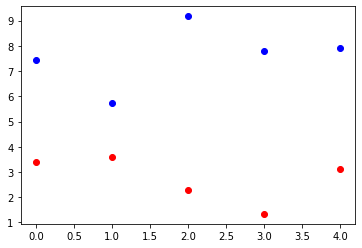

In [130]:
#write code here
dataset_0=[]
dataset_1=[]
for i in dataset:
    if(i[1]==0.0):
        dataset_0.append(i[0])
    else:
        dataset_1.append(i[0])
dataset_0=np.array(dataset_0)
dataset_1=np.array(dataset_1)
p1=len(dataset_0)/(len(dataset_0)+len(dataset_1))
p2=len(dataset_1)/(len(dataset_0)+len(dataset_1))
print("Class Probability P1 = {0}".format(p1))
print("Class Probability P2 = {0}".format(p2))

plt.plot(dataset_0,"ro")
plt.plot(dataset_1,"bo")

### Find sample mean and sample standard deviation for each class 

In [131]:
def mean(data):
    return np.mean(data)
def stddev(data):
    return np.std(data)

### Plot $p_1(x)$ and $p_2(x)$

In [132]:
# Calculate the Gaussian probability distribution function for x
def generate_distribution(data):
    u=mean(data)
    std=stddev(data)
    dist=norm(u,std)
    return dist
    

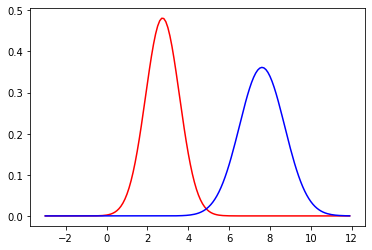

In [133]:
x  = np.arange(-3,12,0.1)
dist0=generate_distribution(dataset_0)
dist1=generate_distribution(dataset_1)
y0 = dist0.pdf(x)
y1 = dist1.pdf(x)
plt.plot(x,y0,"r",label='p1')
plt.plot(x,y1,"b",label='p2')

### Test for $x=3$  and $x=5$

In [134]:
x=3
pA = p1 * dist0.pdf(x)
pB = p2 * dist1.pdf(x)
if(pA>pB):
    print("Class 1 (val:0)")
else:
    print("Class 2 (val:1)")

Class 1 (val:0)


In [135]:
x=5
pA = p1 * dist0.pdf(x)
pB = p2 * dist1.pdf(x)
if(pA>pB):
    print("Class 1 (val:0)")
else:
    print("Class 2 (val:1)")

Class 2 (val:1)


## Homework:
1. Try for this 2-D data using classnote
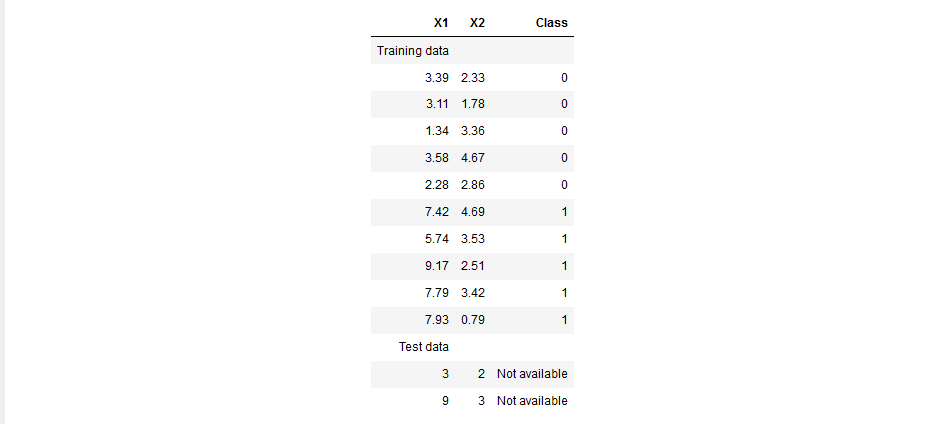
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

## 1. Using naive Bayes classifier for simplicity

In [136]:
data=[{"values":np.array([3.39,3.11,1.34,3.58,2.28]), "label":0},
        {"values":np.array([2.33,1.78,3.36,4.67,2.86]), "label":0},
        {"values":np.array([7.42,5.74,9.17,7.79,7.93]), "label":1},
        {"values":np.array([4.69,3.53,2.51,3.42,0.79]),"label":1}]
dist10=generate_distribution([3.39,3.11,1.34,3.58,2.28])
dist20=generate_distribution([3.39,3.11,1.34,3.58,2.28])
dist0=[]
dist1=[]
p1=p2=0.5
for i in data:
    if(i["label"]==0):
        dist0.append(generate_distribution(i["values"]))
    else:
        dist1.append(generate_distribution(i["values"]))


def probability(x,y):
    pA = p1 * dist0[0].pdf(x) * dist0[1].pdf(y)
    pB = p2 * dist1[0].pdf(x) * dist1[1].pdf(y)
    pA = pA / (pA+pB)
    pB = 1-pA
    if(pA>pB):
        print("Class 1 (val 0) with probability:{}%".format(pA*100))
    else:
        print("Class 2 (val 1) with probability:{}%".format(pB*100))
    
probability(3,2)
probability(9.0,3.0)
   

Class 1 (val 0) with probability:99.98761599264799%
Class 2 (val 1) with probability:99.99999999983898%


##  2. IRIS DATA SET

In [137]:
from csv import reader
import numpy as np
from random import seed
from random import randrange

def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    class_values=dict()
    for i in dataset:
        for j in range(len(i)-1):
            i[j]=float(i[j].strip())
        if(i[-1] not in class_values):
            class_values[i[-1]]=len(class_values)
        i[-1]=class_values[i[-1]]
    return (dataset,class_values)
def separate_classes(dataset):
    separated=dict()
    for row in dataset:
        if(row[-1] not in separated):
            separated[row[-1]]=list()
        separated[row[-1]].append(row[0:4])
    return separated
def stats_dataset(dataset):
    statistics=[(np.mean(column),np.std(column), len(column)) for column in zip(*dataset)]
    return statistics
def stats_all(dataset):
    stats=dict()
    for label in dataset:
        stats[label]=stats_dataset(dataset[label])
    return stats
def gen_dist(mean,std):
    dist=norm(mean,std)
    return dist
def dist(stats):
    dists=dict()
    for label in stats:
        dists[label]=list()
        for stat in stats[label]:
            dists[label].append(gen_dist(stat[0],stat[1]))
    return dists
def class_len(dataset):
    class_lengths=dict()
    for label in dataset:
        class_lengths[label]=len(dataset[label])
    return class_lengths
def prob(class_lengths):
    total=0
    for label in class_lengths:
        total=total+class_lengths[label]
    probs=dict()
    for label in class_lengths:
        probs[label]=class_lengths[label]/total
    return probs

def predict_class(row,dists):
    prob=dict()
    for label in dists:
        prob[label]=class_prob[label]
        for i in range(len(row)):
            prob[label]=prob[label]*dists[label][i].pdf(row[i])
    best_p=-1
    best_val=None
    for class_value,p in prob.items():
        if best_val is None or best_p<p:
            best_val=class_value
            best_p=p
    return best_val

def split_data(dataset,n_folds):
    data_copy=list(dataset)
    data_folds=list()
    fold_size=int(len(dataset)/n_folds)
    for _ in range(n_folds):
        fold=list()
        while len(fold) < fold_size:
            i=randrange(len(data_copy))
            fold.append(data_copy.pop(i))
        data_folds.append(fold)
    return data_folds

def evaluate(dataset,n_folds,dists):
    data_fold=split_data(dataset,n_folds)
    accuracy=list()
    for fold in data_fold:
        correct=0
        for row in fold:
            predicted = predict_class(row[0:4],dists)
            actual = row[4]
            if(actual==predicted):
                correct=correct+1
        accuracy.append((correct/len(fold))*100)
    mean_accuracy=0
    for i in accuracy:
        mean_accuracy=mean_accuracy+i
    mean_accuracy=mean_accuracy/len(accuracy)
    return accuracy,mean_accuracy
    
seed(1)
n_folds=5
filename='iris.csv'
data,class_values=load_csv(filename)
dataset=separate_classes(data)
stats=stats_all(dataset)
dists=dist(stats)
class_prob=prob(class_len(dataset))
accuracy,mean=evaluate(data,n_folds,dists)

print("MEAN ACCURACY: {}".format(mean))
print("ACCURACY OF FOLDS({}): {}".format(n_folds,accuracy))



MEAN ACCURACY: 96.0
ACCURACY OF FOLDS(5): [96.66666666666667, 96.66666666666667, 100.0, 93.33333333333333, 93.33333333333333]


## 2. K-Nearest neighbour (KNN)

Consider the following observations:
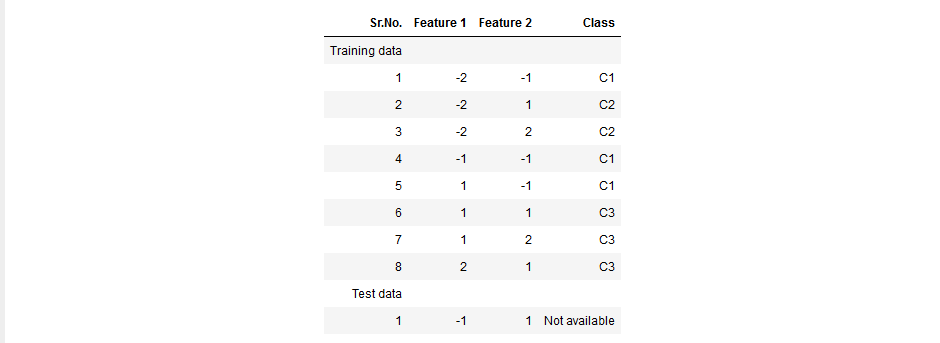

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [138]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


In [139]:
from math import sqrt
classes=set(data[0:,2])
count=dict()
for c in classes:
    count[c]=0
k=3
def dist(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
def test(testrow):
    distarray=list()
    for row in data:
        distarray.append((dist(testrow,row[0:2]),int(row[2])))
    distarray.sort(key= lambda e:e[0])
    for i in range(k):
        count[distarray[i][1]]+=1
    max_val=-1
    predict=None
    for c,i in count.items():
        if predict==None or i>max_val:
            max_val=i
            predict=c
    print("Predicted class: {}".format(int(predict)))

test([1,-1])

Predicted class: 1


## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

centroid 1:[-2.          0.66666667]
centroid 2:[ 0. -1.]
centroid 3:[1.33333333 1.33333333]


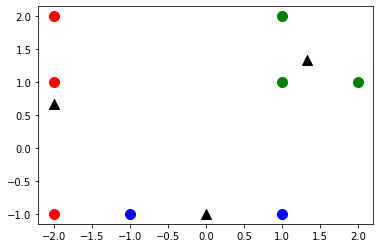

In [140]:
import math
import numpy as np
import matplotlib.pyplot as plt
import copy

k=3
initial_cluster = [1,1,2,2,2,3,3,3]

cluster_data = data[:,:-1]
index=0
x=list()
for row in cluster_data:
    y=list()
    for p in row:
        y.append(p)
    y=np.array(y)
    x.append({"point":y,"cluster":initial_cluster[index]})
    index+=1
cluster_data=x

def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

def calc_centroids(cluster_data):
    centroids=dict()
    for point in cluster_data:
        if(point["cluster"] not in centroids):
            centroids[point["cluster"]]=dict()
            centroids[point["cluster"]]["point"]=np.array([0.0,0.0])
            centroids[point["cluster"]]["n"]=0
        centroids[point["cluster"]]["point"]+=point["point"]
        centroids[point["cluster"]]["n"]+=1
        
    for cluster in centroids:
        centroids[cluster]["point"]/=centroids[cluster]["n"]
        #centroid["point"]/=centroid["n"]
    return centroids

def calc_new_clusterlist(cluster_data,centroids):
    new_cluster_data=copy.deepcopy(cluster_data)
    for point in new_cluster_data:
        min_dist=10.0
        new_cluster=None
        for centroid in centroids:
            dist=calc_distance(centroids[centroid]["point"],point["point"])
            if dist<min_dist or new_cluster == None:
                min_dist=dist
                new_cluster=centroid
        point["cluster"]=new_cluster
    return new_cluster_data

centroids=calc_centroids(cluster_data)

new_cluster_data=calc_new_clusterlist(cluster_data,centroids)


def convert_cluster_data(cluster_data):
    cluster_list=list()
    for i in cluster_data:
        cluster_list.append(i["cluster"])
    return cluster_list

def check_cluster_change(old_cluster_data,new_cluster_data):
    return not convert_cluster_data(old_cluster_data)==convert_cluster_data(new_cluster_data)

centroids=calc_centroids(cluster_data)
new_cluster_data=calc_new_clusterlist(cluster_data,centroids)
iterations=20
count=0
while check_cluster_change(cluster_data,new_cluster_data) and count < iterations:
    centroids=calc_centroids(new_cluster_data)
    cluster_data=new_cluster_data
    new_cluster_data=calc_new_clusterlist(cluster_data,centroids)

for centroid in centroids:
    print("centroid {}:{}".format(centroid, centroids[centroid]["point"]))
    plt.scatter(centroids[centroid]["point"][0],centroids[centroid]["point"][1],marker="^",s=100,color='black')

for point in cluster_data:
    if(point["cluster"]==1):
        color="red"
    if(point["cluster"]==2):
        color="blue"
    if(point["cluster"]==3):
        color="green"
    plt.scatter(point["point"][0],point["point"][1],color=color,s=100)



